In [85]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [86]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [87]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.49, 0.58, 0.56],
   [0.45, 0.58, 0.6],
   [0.41, 0.59, 0.51],
   [0.5, 0.58, 0.33]],
  [[0.49, 0.58, 0.56],
   [0.45, 0.58, 0.6],
   [0.41, 0.59, 0.51],
   [0.5, 0.58, 0.33],
   [0.48, 0.6, 0.45],
   [0.44, 0.59, 0.48]],
  [[0.41, 0.59, 0.51],
   [0.5, 0.58, 0.33],
   [0.48, 0.58, 0.45],
   [0.37, 0.6, 0.43],
   [0.42, 0.58, 0.48],
   [0.47, 0.59, 0.38],
   [0.49, 0.58, 0.39],
   [0.53, 0.6, 0.32]],
  [[0.5, 0.58, 0.33],
   [0.37, 0.6, 0.43],
   [0.42, 0.58, 0.48],
   [0.43, 0.58, 0.35],
   [0.54, 0.59, 0.31],
   [0.36, 0.59, 0.48],
   [0.55, 0.57, 0.46],
   [0.4, 0.58, 0.49],
   [0.52, 0.59, 0.32],
   [0.53, 0.57, 0.56]],
  [[0.5, 0.58, 0.33],
   [0.43, 0.58, 0.35],
   [0.54, 0.59, 0.31],
   [0.55, 0.57, 0.46],
   [0.52, 0.59, 0.32],
   [0.36, 0.58, 0.46],
   [0.48, 0.59, 0.33],
   [0.43, 0.57, 0.56],
   [0.37, 0.58, 0.43],
   [0.41, 0.58, 0.42]],
  [[0.5, 0.58, 0.33],
   [0.43, 0.58, 0.35],
   [0.55, 0.57, 0.46],
   [0.48, 0.59, 0.33],
   [0.43, 0.57, 0.56],
   [0.37, 

In [88]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.41
MIN of objective index 1: 0.58
MIN of objective index 2: 0.33
AVG of objective index 0: 0.4625
AVG of objective index 1: 0.5825
AVG of objective index 2: 0.5
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.41
MIN of objective index 1: 0.58
MIN of objective index 2: 0.33
AVG of objective index 0: 0.46166666666666667
AVG of objective index 1: 0.5866666666666666
AVG of objective index 2: 0.48833333333333334
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.37
MIN of objective index 1: 0.58
MIN of objective index 2: 0.32
AVG of objective index 0: 0.45875
AVG of objective index 1: 0.5874999999999999
AVG of objective index 2: 0.41125
--------------
For the run index run_0 and generation index 3:
MIN of objective index 0: 0.36
MIN of objective index 1: 0.57
MIN of objective index 2: 0.31
AVG of objective index 0: 0.462
AVG of object

{'run_0': {0: {'min_obj1': 0.41,
   'min_obj2': 0.58,
   'min_obj3': 0.33,
   'avg_obj1': 0.4625,
   'avg_obj2': 0.5825,
   'avg_obj3': 0.5},
  1: {'min_obj1': 0.41,
   'min_obj2': 0.58,
   'min_obj3': 0.33,
   'avg_obj1': 0.46166666666666667,
   'avg_obj2': 0.5866666666666666,
   'avg_obj3': 0.48833333333333334},
  2: {'min_obj1': 0.37,
   'min_obj2': 0.58,
   'min_obj3': 0.32,
   'avg_obj1': 0.45875,
   'avg_obj2': 0.5874999999999999,
   'avg_obj3': 0.41125},
  3: {'min_obj1': 0.36,
   'min_obj2': 0.57,
   'min_obj3': 0.31,
   'avg_obj1': 0.462,
   'avg_obj2': 0.583,
   'avg_obj3': 0.421},
  4: {'min_obj1': 0.36,
   'min_obj2': 0.57,
   'min_obj3': 0.31,
   'avg_obj1': 0.45899999999999996,
   'avg_obj2': 0.581,
   'avg_obj3': 0.397},
  5: {'min_obj1': 0.33,
   'min_obj2': 0.57,
   'min_obj3': 0.3,
   'avg_obj1': 0.42933333333333334,
   'avg_obj2': 0.5806666666666666,
   'avg_obj3': 0.43},
  6: {'min_obj1': 0.3,
   'min_obj2': 0.56,
   'min_obj3': 0.3,
   'avg_obj1': 0.438999999999999

{0: {'min_obj1': 0.41, 'min_obj2': 0.58, 'min_obj3': 0.33, 'avg_obj1': 0.4625, 'avg_obj2': 0.5825, 'avg_obj3': 0.5}, 1: {'min_obj1': 0.41, 'min_obj2': 0.58, 'min_obj3': 0.33, 'avg_obj1': 0.46166666666666667, 'avg_obj2': 0.5866666666666666, 'avg_obj3': 0.48833333333333334}, 2: {'min_obj1': 0.37, 'min_obj2': 0.58, 'min_obj3': 0.32, 'avg_obj1': 0.45875, 'avg_obj2': 0.5874999999999999, 'avg_obj3': 0.41125}, 3: {'min_obj1': 0.36, 'min_obj2': 0.57, 'min_obj3': 0.31, 'avg_obj1': 0.462, 'avg_obj2': 0.583, 'avg_obj3': 0.421}, 4: {'min_obj1': 0.36, 'min_obj2': 0.57, 'min_obj3': 0.31, 'avg_obj1': 0.45899999999999996, 'avg_obj2': 0.581, 'avg_obj3': 0.397}, 5: {'min_obj1': 0.33, 'min_obj2': 0.57, 'min_obj3': 0.3, 'avg_obj1': 0.42933333333333334, 'avg_obj2': 0.5806666666666666, 'avg_obj3': 0.43}, 6: {'min_obj1': 0.3, 'min_obj2': 0.56, 'min_obj3': 0.3, 'avg_obj1': 0.43899999999999995, 'avg_obj2': 0.577, 'avg_obj3': 0.409}, 7: {'min_obj1': 0.3, 'min_obj2': 0.56, 'min_obj3': 0.29, 'avg_obj1': 0.4018181

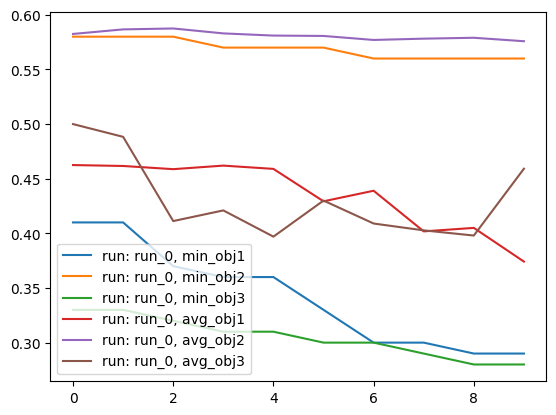

{0: {'min_obj1': 0.44, 'min_obj2': 0.61, 'min_obj3': 0.19, 'avg_obj1': 0.512, 'avg_obj2': 0.622, 'avg_obj3': 0.286}, 1: {'min_obj1': 0.42, 'min_obj2': 0.61, 'min_obj3': 0.19, 'avg_obj1': 0.48, 'avg_obj2': 0.625, 'avg_obj3': 0.245}, 2: {'min_obj1': 0.41, 'min_obj2': 0.6, 'min_obj3': 0.19, 'avg_obj1': 0.47285714285714286, 'avg_obj2': 0.62, 'avg_obj3': 0.2571428571428572}, 3: {'min_obj1': 0.34, 'min_obj2': 0.6, 'min_obj3': 0.19, 'avg_obj1': 0.4328571428571429, 'avg_obj2': 0.62, 'avg_obj3': 0.22142857142857145}, 4: {'min_obj1': 0.32, 'min_obj2': 0.6, 'min_obj3': 0.19, 'avg_obj1': 0.40555555555555556, 'avg_obj2': 0.6177777777777778, 'avg_obj3': 0.25222222222222224}, 5: {'min_obj1': 0.26, 'min_obj2': 0.6, 'min_obj3': 0.19, 'avg_obj1': 0.42181818181818187, 'avg_obj2': 0.6145454545454545, 'avg_obj3': 0.22}, 6: {'min_obj1': 0.26, 'min_obj2': 0.59, 'min_obj3': 0.19, 'avg_obj1': 0.42166666666666663, 'avg_obj2': 0.6091666666666666, 'avg_obj3': 0.24833333333333332}, 7: {'min_obj1': 0.22, 'min_obj2'

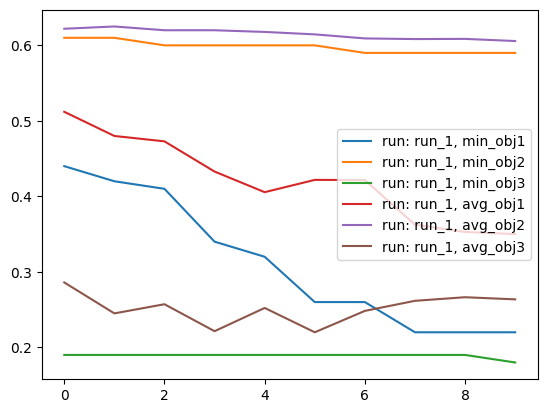

{0: {'min_obj1': 0.42, 'min_obj2': 0.71, 'min_obj3': 0.14, 'avg_obj1': 0.526, 'avg_obj2': 0.719, 'avg_obj3': 0.24300000000000002}, 1: {'min_obj1': 0.42, 'min_obj2': 0.7, 'min_obj3': 0.14, 'avg_obj1': 0.532, 'avg_obj2': 0.721, 'avg_obj3': 0.188}, 2: {'min_obj1': 0.42, 'min_obj2': 0.69, 'min_obj3': 0.14, 'avg_obj1': 0.5118181818181818, 'avg_obj2': 0.7163636363636363, 'avg_obj3': 0.19545454545454544}, 3: {'min_obj1': 0.42, 'min_obj2': 0.69, 'min_obj3': 0.13, 'avg_obj1': 0.500625, 'avg_obj2': 0.71375, 'avg_obj3': 0.198125}, 4: {'min_obj1': 0.4, 'min_obj2': 0.69, 'min_obj3': 0.13, 'avg_obj1': 0.5083333333333333, 'avg_obj2': 0.7083333333333334, 'avg_obj3': 0.19611111111111112}, 5: {'min_obj1': 0.35, 'min_obj2': 0.69, 'min_obj3': 0.13, 'avg_obj1': 0.48857142857142855, 'avg_obj2': 0.7080952380952381, 'avg_obj3': 0.20142857142857146}, 6: {'min_obj1': 0.35, 'min_obj2': 0.68, 'min_obj3': 0.13, 'avg_obj1': 0.483125, 'avg_obj2': 0.708125, 'avg_obj3': 0.1825}, 7: {'min_obj1': 0.31, 'min_obj2': 0.67,

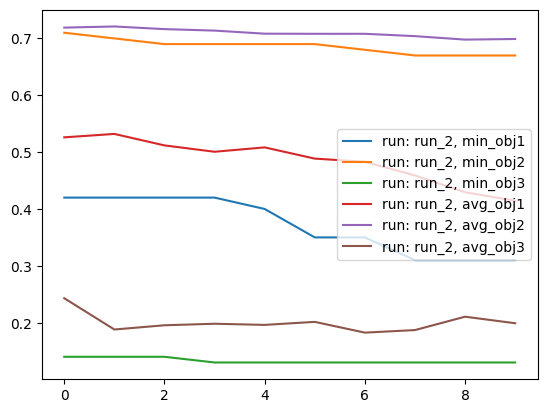

In [ ]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)
            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)